In [102]:
from googleapiclient.discovery import build
import pandas as pd
from dateutil import parser
from IPython.display import JSON
from YouTubeMethods import *

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker

In [103]:
api_key = '' #key for us to use the youtube api


In [104]:
channel_ids = ["UCo0ae5nYA7VqaXzerajD0lg"]

In [105]:
api_service_name = "youtube"
api_version = "v3"
    

    # Get credentials and create an API client, builds the youtube object
youtube = build(
    api_service_name, api_version, developerKey=api_key)
request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id="UCBJycsmduvYEL83R_U4JriQ"
)
response = request.execute()
JSON(response) #gives the channel object and the data in it using Json to see the information we can find in it

<IPython.core.display.JSON object>

In [106]:
channel_stats = get_channel_stats(youtube,"UCBJycsmduvYEL83R_U4JriQ")

In [107]:
channel_stats #Uses the function to display a table with MKBHD's stats

,channelName,subscribers,views,totalVideos,playlistId
0,Marques Brownlee,16400000,3247962309,1491,UUBJycsmduvYEL83R_U4JriQ


In [108]:
playlist_id = channel_stats['playlistId'].values[0]

In [109]:
video_ids = get_video_ids(youtube, playlist_id) #Displays information for every video in MKBHD's YouTube timeline

In [110]:
video_df = get_video_details(youtube, video_ids)
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,O_WbmIIy4vk,Marques Brownlee,"iPad Pro M2: What Does ""Pro"" Even Mean?",Don't let this distract you from the fact that...,"[iPad, iPad Pro, iPad Pro M2, M2 iPad, MKBHD, ...",2022-11-18T21:48:49Z,1629824,72544,None,3566,PT9M9S,hd,true
1,a-El3Ych3hI,Marques Brownlee,Google Hits Back at iMessage!,"Your move, Apple (they'll probably do nothing)","[Google, Apple, mkbhd, iMessage]",2022-11-14T20:30:01Z,3646918,251698,None,5533,PT59S,hd,false
2,4yjRIcRc9qY,Marques Brownlee,Lucid Air: How to One-up Tesla!,Lucid Air beats Tesla's flagship at almost eve...,"[Lucid Air, Lucid, Lucid vs Tesla, Lucid vs, M...",2022-11-11T19:27:05Z,3498400,124635,None,6618,PT13M23S,hd,true
3,I1qsF0WQy8c,Marques Brownlee,Dear Twitter!,I can see you're going through a lot. But I ha...,"[Twitter, dear twitter, MKBHD, Elon Musk, Elon...",2022-11-08T02:29:45Z,4344101,188958,None,12848,PT14M30S,hd,true
4,UdgRUCVUts0,Marques Brownlee,The iPhone USB-C Law: Explained!,All opinions in the video are my own. Armchair...,"[mkbhd, USBC iPhone, iPhone USB, iPhone USBC, ...",2022-11-02T17:58:32Z,4746798,179745,None,14685,PT9M17S,hd,true
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,hCEBLSSU-2Y,Marques Brownlee,Fraps HD Test in 1080p (18 WOS),"***WATCH IN HD***\r\n\r\nAlso, check out my vi...","[fraps, hd, high, definition, 720, 1080, 18, w...",2009-01-01T22:30:32Z,135484,1648,None,240,PT1M31S,hd,false
1485,9gk_rl3y_SU,Marques Brownlee,HP Pavilion dv7t Media Center Remote Overview,This is my short review of the Media Center Re...,"[hp, pavilion, dv7, laptop, 17, inch, desktop,...",2009-01-01T19:43:47Z,4707542,236265,None,36867,PT2M51S,sd,false
1486,f7mqssf66l4,Marques Brownlee,High fps LG Voyager footage,This video was uploaded directly from my LG Vo...,"[mobile, video, cellphone, high, fps, footage,...",2008-09-16T01:33:42Z,187629,2757,None,728,PT31S,sd,false
1487,PD5igzFB8iY,Marques Brownlee,14 Year knock-down shot (11 Handicap),"Me hitting a knock-down shot with a six iron, ...","[golf, tiger, woods, prodigy, amazing, analysi...",2008-05-30T20:27:17Z,181454,2303,None,362,PT41S,sd,false


## Data pre-processing

In [111]:
video_df.isnull().any() #See if any video does not have certain information

video_id          False
channelTitle      False
title             False
description       False
tags               True
publishedAt       False
viewCount          True
likeCount          True
favouriteCount     True
commentCount       True
duration          False
definition        False
caption           False
dtype: bool

In [112]:
video_df.dtypes

video_id          object
channelTitle      object
title             object
description       object
tags              object
publishedAt       object
viewCount         object
likeCount         object
favouriteCount    object
commentCount      object
duration          object
definition        object
caption           object
dtype: object

In [113]:
numeric_cols = ['viewCount', 'likeCount', 'favouriteCount', 'commentCount']
video_df[numeric_cols] = video_df[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis = 1) #Change cateogical variables to numeric

In [114]:
video_df['publishedAt'] = video_df['publishedAt'].apply(lambda x: parser.parse(x)) 
video_df['pushblishDayName'] = video_df['publishedAt'].apply(lambda x: x.strftime("%A")) #Converts the published day of the video

In [115]:
import isodate
video_df['durationSecs'] = video_df['duration'].apply(lambda x: isodate.parse_duration(x))
video_df['durationSecs'] = video_df['durationSecs'].astype('timedelta64[s]') #Converts the time to actual seconds

In [116]:
video_df[['durationSecs', 'duration']]

,durationSecs,duration
0,549.0,PT9M9S
1,59.0,PT59S
2,803.0,PT13M23S
3,870.0,PT14M30S
4,557.0,PT9M17S
...,...,...
1484,91.0,PT1M31S
1485,171.0,PT2M51S
1486,31.0,PT31S
1487,41.0,PT41S


In [117]:
video_df['tagCount'] = video_df ['tags'].apply(lambda x: 0 if x is None else len(x))

In [118]:
video_df 

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,pushblishDayName,durationSecs,tagCount
0,O_WbmIIy4vk,Marques Brownlee,"iPad Pro M2: What Does ""Pro"" Even Mean?",Don't let this distract you from the fact that...,"[iPad, iPad Pro, iPad Pro M2, M2 iPad, MKBHD, ...",2022-11-18 21:48:49+00:00,1629824.0,72544.0,NaN,3566.0,PT9M9S,hd,true,Friday,549.0,11
1,a-El3Ych3hI,Marques Brownlee,Google Hits Back at iMessage!,"Your move, Apple (they'll probably do nothing)","[Google, Apple, mkbhd, iMessage]",2022-11-14 20:30:01+00:00,3646918.0,251698.0,NaN,5533.0,PT59S,hd,false,Monday,59.0,4
2,4yjRIcRc9qY,Marques Brownlee,Lucid Air: How to One-up Tesla!,Lucid Air beats Tesla's flagship at almost eve...,"[Lucid Air, Lucid, Lucid vs Tesla, Lucid vs, M...",2022-11-11 19:27:05+00:00,3498400.0,124635.0,NaN,6618.0,PT13M23S,hd,true,Friday,803.0,11
3,I1qsF0WQy8c,Marques Brownlee,Dear Twitter!,I can see you're going through a lot. But I ha...,"[Twitter, dear twitter, MKBHD, Elon Musk, Elon...",2022-11-08 02:29:45+00:00,4344101.0,188958.0,NaN,12848.0,PT14M30S,hd,true,Tuesday,870.0,8
4,UdgRUCVUts0,Marques Brownlee,The iPhone USB-C Law: Explained!,All opinions in the video are my own. Armchair...,"[mkbhd, USBC iPhone, iPhone USB, iPhone USBC, ...",2022-11-02 17:58:32+00:00,4746798.0,179745.0,NaN,14685.0,PT9M17S,hd,true,Wednesday,557.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,hCEBLSSU-2Y,Marques Brownlee,Fraps HD Test in 1080p (18 WOS),"***WATCH IN HD***\r\n\r\nAlso, check out my vi...","[fraps, hd, high, definition, 720, 1080, 18, w...",2009-01-01 22:30:32+00:00,135484.0,1648.0,NaN,240.0,PT1M31S,hd,false,Thursday,91.0,14
1485,9gk_rl3y_SU,Marques Brownlee,HP Pavilion dv7t Media Center Remote Overview,This is my short review of the Media Center Re...,"[hp, pavilion, dv7, laptop, 17, inch, desktop,...",2009-01-01 19:43:47+00:00,4707542.0,236265.0,NaN,36867.0,PT2M51S,sd,false,Thursday,171.0,10
1486,f7mqssf66l4,Marques Brownlee,High fps LG Voyager footage,This video was uploaded directly from my LG Vo...,"[mobile, video, cellphone, high, fps, footage,...",2008-09-16 01:33:42+00:00,187629.0,2757.0,NaN,728.0,PT31S,sd,false,Tuesday,31.0,12
1487,PD5igzFB8iY,Marques Brownlee,14 Year knock-down shot (11 Handicap),"Me hitting a knock-down shot with a six iron, ...","[golf, tiger, woods, prodigy, amazing, analysi...",2008-05-30 20:27:17+00:00,181454.0,2303.0,NaN,362.0,PT41S,sd,false,Friday,41.0,14


# Best Performing Videos

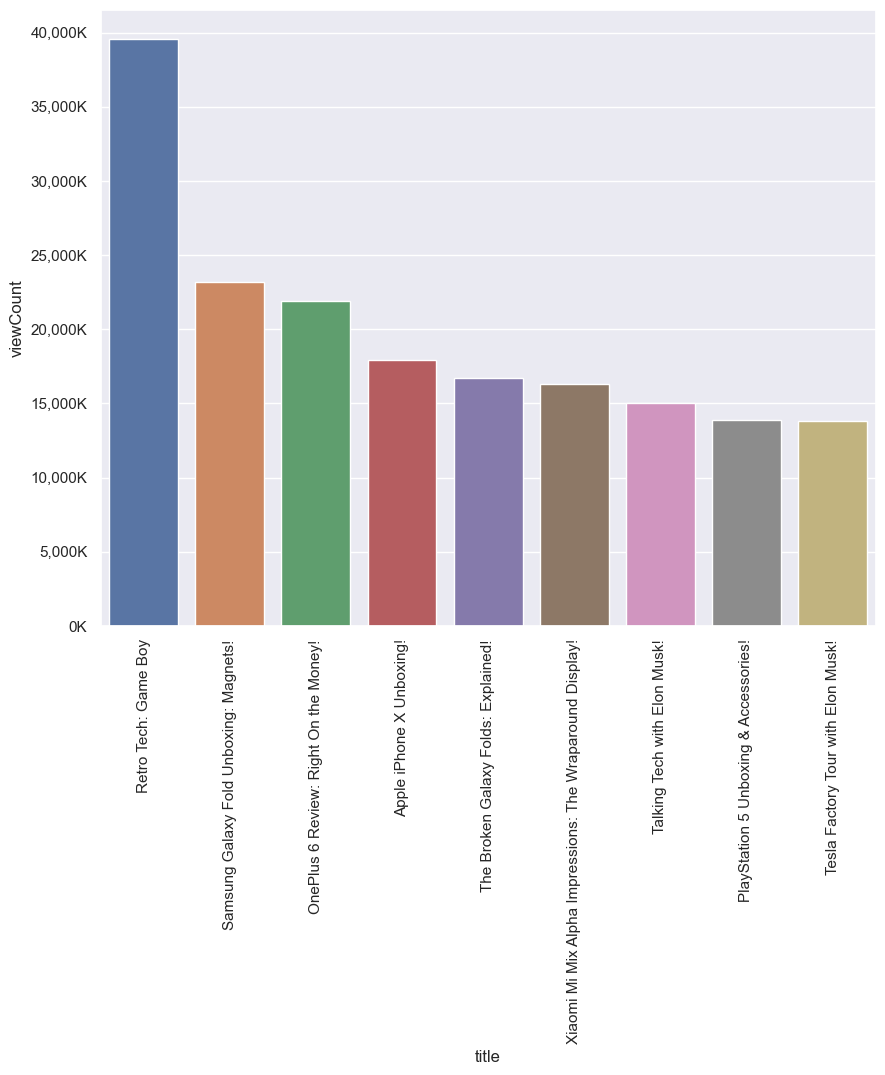

In [119]:
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.barplot(x = 'title', y = 'viewCount', data = video_df.sort_values('viewCount', ascending=False)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))


## Worst Performing Videos


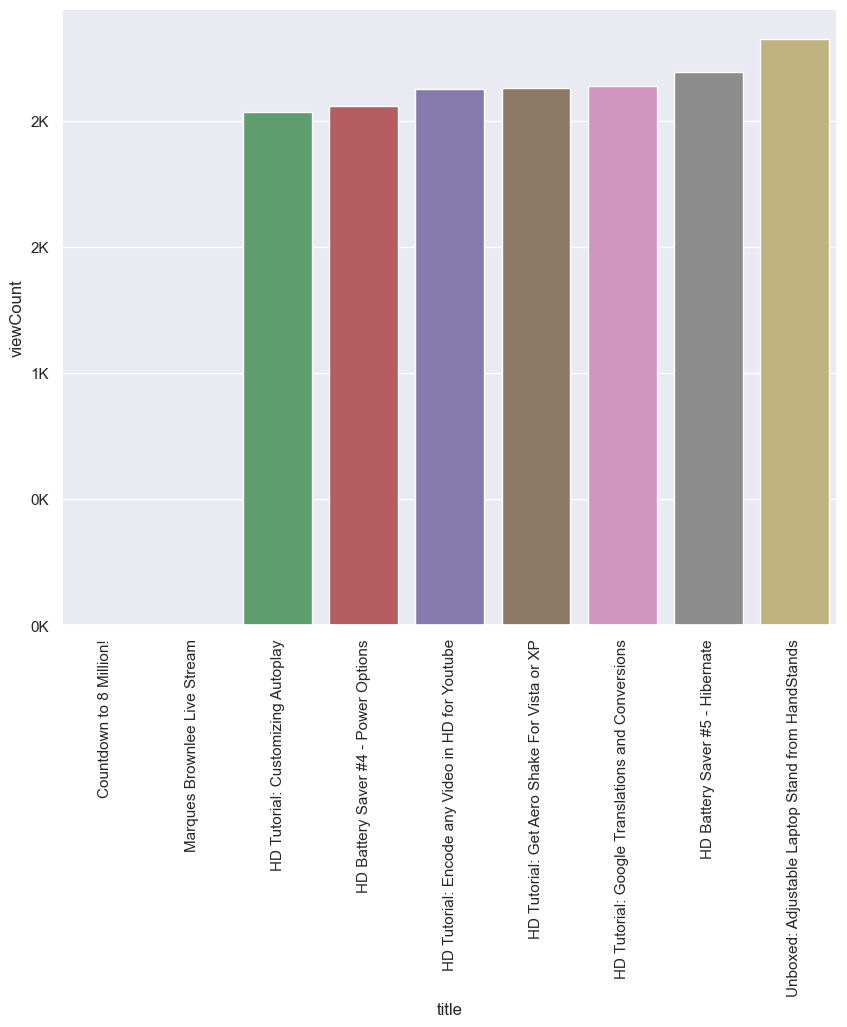

In [120]:
ax = sns.barplot(x = 'title', y = 'viewCount', data = video_df.sort_values('viewCount', ascending = True)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))


## View Distribution per Video

[Text(0, 0, 'MKBHD')]

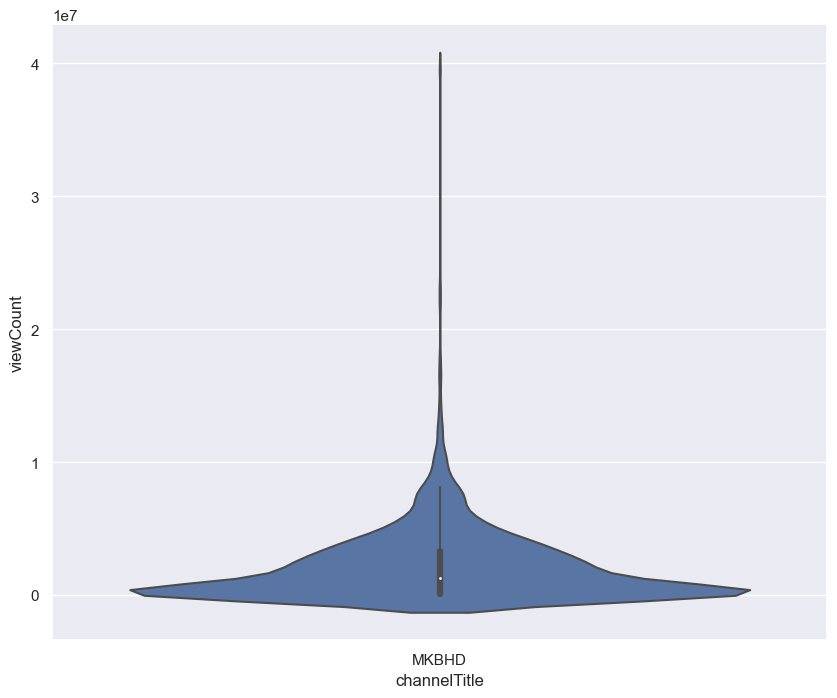

In [126]:
channelName = ['MKBHD']
sns.violinplot(data = video_df, x = "channelTitle", y = "viewCount").set_xticklabels(channelName)


## Views vs likes and comments

<AxesSubplot: xlabel='likeCount', ylabel='viewCount'>

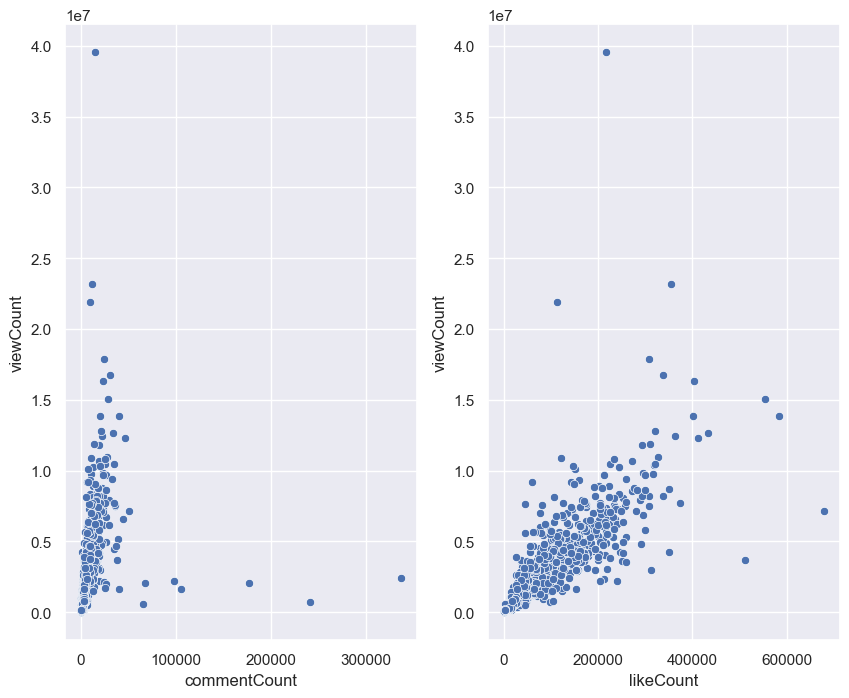

In [122]:
fig, ax = plt.subplots(1,2)
sns.scatterplot(data = video_df, x = 'commentCount', y = 'viewCount', ax = ax[0])
sns.scatterplot(data = video_df, x = 'likeCount', y = 'viewCount', ax = ax[1])


## Video Duraiton

<AxesSubplot: xlabel='durationSecs', ylabel='Count'>

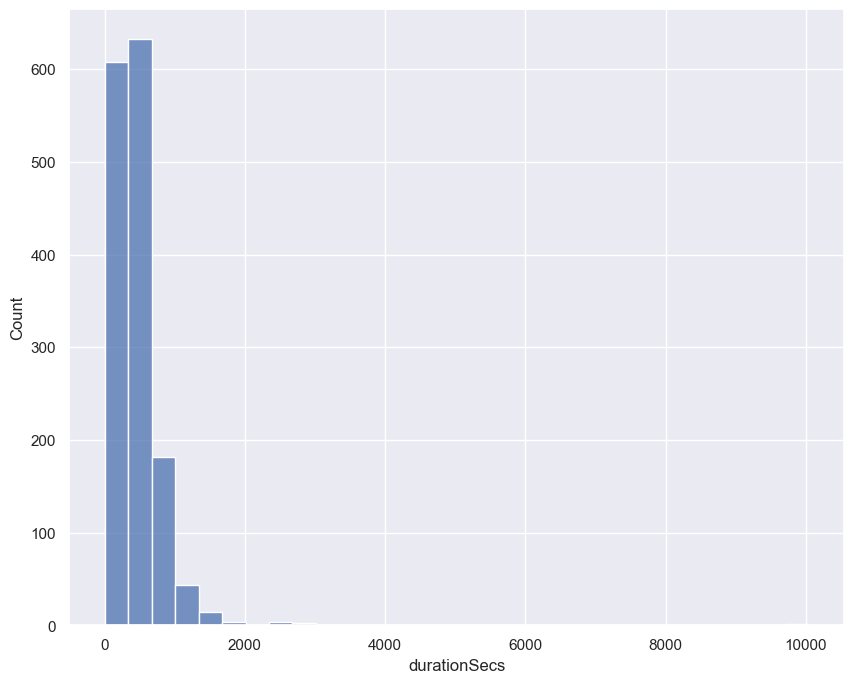

In [123]:
sns.histplot(data = video_df, x = 'durationSecs', bins = 30)

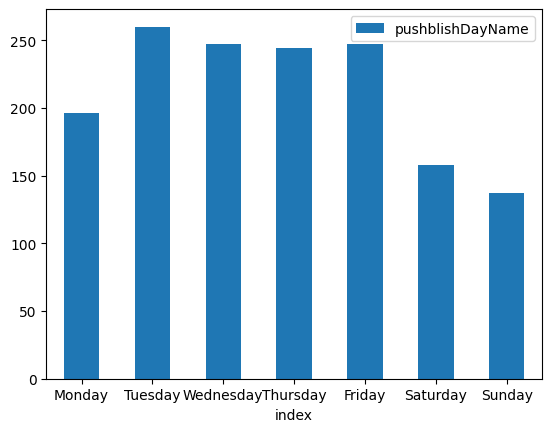

In [30]:
day_df = pd.DataFrame(video_df['pushblishDayName'].value_counts())
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_df = day_df.reindex(weekdays)
ax = day_df.reset_index().plot.bar(x = 'index', y='pushblishDayName', rot=0)